<h1>Twitter Sentiment Classification using Apache Spark</h1>
<br>Additional installation required
We need to install nltk to implement SnowballStemmer. Execute the following command to install nltk<br>
</br>!pip install nltk<br>

In [1]:
import sys
import csv
#from _csv import reader
import string
import re
import random
import pyspark
from nltk.stem.snowball import SnowballStemmer
from pyspark.mllib.classification import NaiveBayes, NaiveBayesModel
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint
from pyspark import SparkContext
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint

import matplotlib.pyplot as plt
import numpy as np

sc = pyspark.SparkContext('local[*]')

Below is the function to perform stemming, using Snowball Stemmer. This function is called later when cleaning the tweets.

In [2]:
def Stemmer_fun(lowercase_tweet):
    empty_string=""
    split_wo=lowercase_tweet.split()
    for i in range(len(split_wo)):
        empty_string=empty_string+" "+(SnowballStemmer("english").stem(split_wo[i]))
    return empty_string
        

The following function CallHashing(wi_punlist,polarity_list) takes two parameters. First paramater is a list of cleaned tweets 
the second parameter is a list of polarities. Using hashingTF this function creates a LabeledPoint of polarity and text of each 
tweet and creates a list of LabeledPoint. We will see later that these LabeledPoint are input to various classifiers.

In [3]:
def CallHashing(wi_punlist,polarity_list):   #this function is used to create LabeledPoint
    hashingTF = HashingTF()
    count=-1
    data=[]
    for line in wi_punlist:
        count=count+1
        documents=line.split(" ")

        tf = hashingTF.transform(documents)
        #print(tf)
        data.append(LabeledPoint(polarity_list[count], tf))
        
    return data


The partition function is used to divide a list into some equal parts. It takes as input two parameters. First parameter is a 
list and second parameter is the number of parts in which a list should be divided. We use this partition function during 10 fold cross validation to divide a list into 10 equal parts.

In [4]:
def partition(lst, n):
    division = len(lst) / float(n)
    return [ lst[int(round(division * i)): int(round(division * (i + 1)))] for i in range(n) ]

The following code block reads the train.csv file and extracts polarity and tweet text from it and then performs cleaning of
words in the tweets, calls Stemmer_fun to perform stemming and removes stopwords from the text of tweets and calls CallHashing function to perform HashingTF to get LabeledPoints

In [6]:
csv_file = open('train.csv','r',encoding='ISO-8859-1')
file_reader = csv.reader(csv_file)
stopwords_file=open('stopwords.txt')
stopwords=[]
for line2 in stopwords_file:
    stopwords.append(line2.strip())
#print(stopwords)
wi_punlist=[]
polarity_list=[]
orig_tweet=[]

for row in file_reader:
    tweet=row[5]
    orig_tweet.append(tweet)
    lowercase_tweet=tweet.lower()
    polarity=row[0]
    polarity_list.append(polarity)



    lowercase_tweet=re.sub(r'(http|https|http\(s\)):\/\/[^\s]*[\r\n]*', "URL",lowercase_tweet)# replace http or https by URL
    lowercase_tweet=re.sub(r'(www\.)[^\s]*[\r\n]*',"URL",lowercase_tweet) #remove tweet words starting with www.with URL
    lowercase_tweet=re.sub(r'@[^\s]*[\r\n]*', "AT_USER", lowercase_tweet)#replace strings starting with @ with AT_USER
    lowercase_tweet=re.sub(r'((.)\2)(\2+)', r'\1', lowercase_tweet) #remove multiple occurances of a character like hellooooo
    lowercase_tweet=re.sub(r'(^|\s)[0-9]+[^\s]*',"",lowercase_tweet) #remove characters starting with number


    lowercase_tweet=Stemmer_fun(lowercase_tweet)



    pun=set(string.punctuation)
    without_pun=''.join(x for x in lowercase_tweet if x not in pun)
    wi_punlist.append(without_pun)



for i in range(len(wi_punlist)):
    split_word=wi_punlist[i].split()
    for j in range(len(split_word)):
        if split_word[j] in stopwords:
            wi_punlist[i]=re.sub(r"\b"+split_word[j]+r"\b","",wi_punlist[i])



list_words=[]
for tweet in wi_punlist:
    for var in tweet.split():
        if var.strip() in list_words:
            continue
        else:
            list_words.append(var)




data=CallHashing(wi_punlist,polarity_list)

#test_data=testfile()

#############################################################################################
random.shuffle(data)

randomdata_list=[]
randomdata_list.extend(data)

data_foldlist=[]
data_foldlist=partition(randomdata_list, 10)
#############################################################################################

#Accuracy_NB_training=BuildNaiveBayesClassifier(data)           #######uncomment it

#Accuracy_LR_training=LogicalRegressionClassifier(data)##################### uncomment it




#Accuracy_NB_Kfold=KfoldNaiveBayes(data_foldlist) ##########uncomment it



#Accuracy_LR_Kfold=KfoldLogicalRegression(data_foldlist) ####################uncomment it


#Accuracy_NB_test=NaiveBayesTrainTest(data,test_data) #####################uncomment it

#Accuracy_LR_test=LogicalRegressionTrainTest(data,test_data,polarity_list,orig_tweet) ################uncomment it




#x_NB= [2,4,6]
#y_NB=[]

#y_NB.append(Accuracy_NB_training)
#y_NB.append(Accuracy_NB_test)
#y_NB.append(Accuracy_NB_Kfold)

#PlotGraph(x_NB,y_NB)


#x_LR=[2,4]
#y_LR=[]

#y_LR.append(Accuracy_LR_training)
#y_LR.append(Accuracy_LR_test)
#y_LR.append(Accuracy_LR_Kfold)

#PlotGraph(x_LR,y_LR)













The following code block reads the test.csv file and extracts polarity and tweet text from it and then performs cleaning of
words in the tweets, calls Stemmer_fun to perform stemming and removes stopwords from the text of tweets and calls CallHashing function to perform HashingTF to get LabeledPoints

In [7]:
# To clean the test.csv file
csv_file = open('test.csv','r',encoding='ISO-8859-1')
file_reader = csv.reader(csv_file)
stopwords_file=open('stopwords.txt')
stopwords=[]
for line2 in stopwords_file:
    stopwords.append(line2.strip())
#print(stopwords)
wi_punlist=[]
polarity_list=[]

for row in file_reader:
    tweet=row[5]
    lowercase_tweet=tweet.lower()
    polarity=row[0]
    polarity_list.append(polarity)



    lowercase_tweet=re.sub(r'(http|https|http\(s\)):\/\/[^\s]*[\r\n]*', "URL",lowercase_tweet)# replace http or https by URL
    lowercase_tweet=re.sub(r'(www\.)[^\s]*[\r\n]*',"URL",lowercase_tweet) #remove tweet words starting with www. with URL
    lowercase_tweet=re.sub(r'@[^\s]*[\r\n]*', "AT_USER", lowercase_tweet)#replace strings starting with @ with AT_USER
    lowercase_tweet=re.sub(r'((.)\2)(\2+)', r'\1', lowercase_tweet) #remove multiple occurances of a character like hellooooo
    lowercase_tweet=re.sub(r'(^|\s)[0-9]+[^\s]*',"",lowercase_tweet) #remove characters starting with number


    lowercase_tweet=Stemmer_fun(lowercase_tweet)



    pun=set(string.punctuation)
    without_pun=''.join(x for x in lowercase_tweet if x not in pun)
    wi_punlist.append(without_pun)



for i in range(len(wi_punlist)):
    split_word=wi_punlist[i].split()
    for j in range(len(split_word)):
        if split_word[j] in stopwords:
            wi_punlist[i]=re.sub(r"\b"+split_word[j]+r"\b","",wi_punlist[i])



list_words=[]
for tweet in wi_punlist:
    for var in tweet.split():
        if var.strip() in list_words:
            continue
        else:
            list_words.append(var)



test_data=CallHashing(wi_punlist,polarity_list)

















The following code is used to build model for Naive Bayes. Here we train our model using data from train.csv file and test 
our model using the same data and find training accuracy

In [8]:
#To Build Naive Bayes Classifier
rdd_train=sc.parallelize(data)
rdd_test=sc.parallelize(data)
training=rdd_train
test=rdd_test

print("######################## To calculate training accuracy for NaiveBayes #############################################")
print("Training of naive Bayes model started")
model = NaiveBayes.train(training, 1.0)
# Make prediction and test accuracy.
predictionAndLabel = test.map(lambda p: (model.predict(p.features), p.label))
accuracy = 1.0 * predictionAndLabel.filter(lambda t: t[0] == t[1]).count() / test.count()


print("Training Accuracy for NaiveBayes Classifier ="+ str(accuracy))
Accuracy_NB_training=accuracy
print("########################################################################################")
    

######################## To calculate training accuracy for NaiveBayes #############################################
Training of naive Bayes model started
Training Accuracy for NaiveBayes Classifier =0.8275
########################################################################################


The following code is used to build model for Logistic Regression. Here we train our model using data from train.csv file and test 
our model using the same data and find training accuracy

In [9]:
# To Build Logical Regression Classifier
rdd_train=sc.parallelize(data)
rdd_test=sc.parallelize(data)
training=rdd_train
test=rdd_test

print("######################## To calculate training accuracy for Logical Regression #####################################")
print("Training of Logical Regression model started")
model = LogisticRegressionWithLBFGS.train(training)
labelsAndPreds = test.map(lambda p: (p.label, model.predict(p.features)))
trainErr = labelsAndPreds.filter(lambda t: t[0] != t[1]).count() / float(test.count())
print("Training Error for Logical Regression Classifier = " + str(trainErr))
accuracy=1-trainErr
print("Training Accuracy for Logical Regression Classifier ="+ str(accuracy))
Accuracy_LR_training=accuracy

print("########################################################################################")

######################## To calculate training accuracy for Logical Regression #####################################
Training of Logical Regression model started
Training Error for Logical Regression Classifier = 0.09075
Training Accuracy for Logical Regression Classifier =0.90925
########################################################################################


The following code is used to build model for Naive Bayes. Here we train our model using data from train.csv file and test 
our model using the data from test.csv file and find test accuracy. We also calculate and print precsion, recall, F1 score,
confusion matrix and area under ROC for Naive Bayes.

In [10]:
# Naive Bayes train test. Train on train.csv and test on test.csv
rdd_train=sc.parallelize(data)
rdd_test=sc.parallelize(test_data)
training=rdd_train
test=rdd_test
print("###################### To calculate test accuracy for NaiveBayes ######################################")
print("Naive Bayes model training started")
model = NaiveBayes.train(training, 1.0)
# Make prediction and test accuracy.
predictionAndLabel = test.map(lambda p: (model.predict(p.features), p.label))
accuracy = 1.0 * predictionAndLabel.filter(lambda t: t[0] == t[1]).count() / test.count()
print("Test Accuracy in Naive Bayes ="+ str(accuracy))

##########################################################################################
TP=predictionAndLabel.filter(lambda t: t[0] == t[1] and t[1]==1).count()
TN=predictionAndLabel.filter(lambda t: t[0] == t[1] and t[1]==0).count()
FP=predictionAndLabel.filter(lambda t: t[0] != t[1] and t[1]==0).count()
FN=predictionAndLabel.filter(lambda t: t[0] != t[1] and t[1]==1).count()

precision=TP/(TP+FP)
recall=TP/(TP+FN)
f1Score=2*(precision*recall)/(precision+recall)

print("Summary Stats for NaiveBayes")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)
print("Confusion matrix is printed below")
row1=str(TN)+'\t'+str(FP)
row2=str(FN)+'\t'+str(TP)
print(row1)
print(row2)

###################################################### following code is for ROC

# Compute raw scores on the test set
predictionAndLabels = test.map(lambda lp: (float(model.predict(lp.features)), lp.label))

# Instantiate metrics object
metrics = BinaryClassificationMetrics(predictionAndLabels)

# Area under precision-recall curve
#print("Area under PR = %s" % metrics.areaUnderPR)

# Area under ROC curve
print("Area under ROC = %s" % metrics.areaUnderROC)

Accuracy_NB_test=accuracy

#####################################################################################

#test1=test.collect()
#model.clearThreshold()
#for i in range (len(test1)):
 #   prediction=model.predict(test1[i].features)
  #  #prediction= test1(lambda p: (model.predict(p.features))
   # print(prediction)
    #if prediction>0.5:
     #   if test1[i].label==1:
      #      print("Correctly predicted tweet with probabilty "+str(prediction)+" : "+tweet_list[i])
       # else:
        #    print("Incorrectly predicted tweet with probabilty "+str(prediction)+" : "+tweet_list[i])

##################################################################following code for statistics
# Overall statistics
#     metrics = MulticlassMetrics(predictionAndLabels)
#     precision = metrics.precision()
#     recall = metrics.recall()
#     f1Score = metrics.fMeasure()
#     print("Summary Stats")
#     print("Precision = %s" % precision)
#     print("Recall = %s" % recall)
#     print("F1 Score = %s" % f1Score)
#     #print("confusion metric without print")
#     #metrics.confusionMatrix().toArray()
#     print("confusion metric after print")
#     print(metrics.confusionMatrix().toArray())

print("########################################################################################")

#return(accuracy)


###########################################################

###################### To calculate test accuracy for NaiveBayes ######################################
Naive Bayes model training started
Test Accuracy in Naive Bayes =0.8133704735376045
Summary Stats for NaiveBayes
Precision = 0.852760736196319
Recall = 0.7637362637362637
F1 Score = 0.8057971014492754
Confusion matrix is printed below
153	24
43	139
Area under ROC = 0.8140715216986404
########################################################################################


The following code is used to build model for Logistic Regression. Here we train our model using data from train.csv file and test 
our model using the data from test.csv file and find test accuracy. We also calculate and print precsion, recall, F1 score,
confusion matrix and area under ROC for Logistic Regression. Here I am also finding and printing some tweets that were classified correctly and some tweets that were classified incorrectly

In [24]:
print("###################### To calculate test accuracy for Logistic Regression ######################################")
pol_list=polarity_list
tweet_list=orig_tweet
rdd_train=sc.parallelize(data)
rdd_test=sc.parallelize(test_data)
training=rdd_train
test=rdd_test
# Train a naive Bayes model.

print("Logistic Regression model training started")
model = LogisticRegressionWithLBFGS.train(training)
labelsAndPreds = test.map(lambda p: (p.label, model.predict(p.features)))
trainErr = labelsAndPreds.filter(lambda t: t[0] != t[1]).count() / float(test.count())
print("Training Error = " + str(trainErr))
accuracy=1-trainErr
print("Test accuracy for Logistic Regression ="+ str(accuracy))
###########################################################################
TP=labelsAndPreds.filter(lambda t: t[0] == t[1] and t[1]==1).count()
TN=labelsAndPreds.filter(lambda t: t[0] == t[1] and t[1]==0).count()
FP=labelsAndPreds.filter(lambda t: t[0] != t[1] and t[1]==0).count()
FN=labelsAndPreds.filter(lambda t: t[0] != t[1] and t[1]==1).count()

precision=TP/(TP+FP)
recall=TP/(TP+FN)
f1Score=2*(precision*recall)/(precision+recall)

print("Summary Stats for Logistic Regression")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)
print("Confusion matrix is printed below")
row1=str(TN)+'\t'+str(FP)
row2=str(FN)+'\t'+str(TP)
print(row1)
print(row2)


###################################################### following code is for ROC

# Compute raw scores on the test set
predictionAndLabels = test.map(lambda lp: (float(model.predict(lp.features)), lp.label))

# Instantiate metrics object
metrics = BinaryClassificationMetrics(predictionAndLabels)

# Area under precision-recall curve
#print("Area under PR = %s" % metrics.areaUnderPR)

# Area under ROC curve
print("Area under ROC = %s" % metrics.areaUnderROC)
##################################################################following code for statistics

test1=test.collect()
model.clearThreshold()
correct_tweet=[]
incorrect_tweet=[]
for i in range (len(test1)):
    prediction=model.predict(test1[i].features)
    #prediction= test1(lambda p: (model.predict(p.features))
    #print(prediction)
    if prediction>0.5:
        if test1[i].label==1:
            #print("Correctly predicted tweet with probabilty "+str(prediction)+" : "+tweet_list[i])
            correct_tweet.append((prediction,tweet_list[i]))
        else:
            #print("Incorrectly predicted tweet with probabilty "+str(prediction)+" : "+tweet_list[i])
            incorrect_tweet.append((prediction,tweet_list[i]))
    else:
        if prediction<0.5:
            if test1[i].label==0:
                #print("Correctly predicted tweet with probabilty "+str(prediction)+" : "+tweet_list[i])
                correct_tweet.append((prediction,tweet_list[i]))
            else:
                #print("Incorrectly predicted tweet with probabilty "+str(prediction)+" : "+tweet_list[i])
                incorrect_tweet.append((prediction,tweet_list[i]))

print("Some tweets that were classified correctly along with their prediction probabilities are")
for j in range(5):
    print(correct_tweet[j])
print("Some tweets that were classified incorrectly along with their prediction probabilities are")   
for j in range(5):
    print(incorrect_tweet[j])
    
correct_tweet=sorted(correct_tweet,key=lambda x:x[0],reverse=True)
incorrect_tweet=sorted(incorrect_tweet,key=lambda x:x[0],reverse=True)

print("5 correct tweets with highest predicted probability are")
for i in range(5):
    print(correct_tweet[i][1])

print("5 incorrect tweets with highest predicted probability are")    
for i in range(5):
    print(incorrect_tweet[i][1])
    
    
Accuracy_LR_test=accuracy

###################################################################################

# Overall statistics
#     metrics = MulticlassMetrics(predictionAndLabels)
#     precision = metrics.precision()
#     recall = metrics.recall()
#     f1Score = metrics.fMeasure()
#     print("Summary Stats")
#     print("Precision = %s" % precision)
#     print("Recall = %s" % recall)
#     print("F1 Score = %s" % f1Score)
#     #print("confusion metric without print")
#     #metrics.confusionMatrix().toArray()
#     print("confusion metric after print")
#     print(metrics.confusionMatrix().toArray())

print("########################################################################################")
#return accuracy


###########################################################


###################### To calculate test accuracy for Logistic Regression ######################################
Logistic Regression model training started
Training Error = 0.2116991643454039
Test accuracy for Logistic Regression =0.7883008356545961
Summary Stats for Logistic Regression
Precision = 0.8296703296703297
Recall = 0.7704081632653061
F1 Score = 0.798941798941799
Confusion matrix is printed below
132	31
45	151
Area under ROC = 0.7877165207673683
Some tweets that were classified correctly along with their prediction probabilities are
(0.9999939438476336, "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D")
(0.9995619952238444, "@alydesigns i was out most of the day so didn't get much done ")
(0.9764762777988473, "really don't feel like getting up today... but got to study to for tomorrows practical exam... ")
(0.7974355272453987, "@BatManYNG I miss my ps3, it's out of commission  Wutcha playing? Have you copped 

In the following code I find 10 fold accuracy for Naive Bayes. It is done by dividing the data which I got from train.csv into 10
equal parts and then training the model on nine parts and testing on one part and repeat it for all possible parts for training 
and testing.

In [12]:
print("###################### To calculate 10fold accuracy for NaiveBayes #############################################")
print("Training of naive Bayes model started")
sum=0
for i in range(len(data_foldlist)):
    list_test=[]
    list_train=[]
    list_test.extend(data_foldlist[i])
    for j in range(len(data_foldlist)):
        if(i!=j):
            list_train.extend(data_foldlist[j])


    rdd_test=sc.parallelize(list_test)
    rdd_train=sc.parallelize(list_train)

    training=rdd_train
    test=rdd_test


    model = NaiveBayes.train(training, 1.0)

    # Make prediction and test accuracy.
    predictionAndLabel = test.map(lambda p: (model.predict(p.features), p.label))

    accuracy = 1.0 * predictionAndLabel.filter(lambda t: t[0] == t[1]).count() / test.count()

    #print("fold value "+ str(i))
    print("Accuracy for fold number "+str(i)+"="+str(accuracy))
    #print(accuracy)
    sum=sum+accuracy



#print("total sum")
#print(sum)


average=sum/10
print("average ten fold accuracy="+str(average))
Accuracy_NB_Kfold=average


print("########################################################################################")
####################################################### to get the best k fold model  
#     list_test2=[]
#     list_train2=[]
#     list_test2.extend(data_foldlist[fold_index])
#     for j in range(len(data_foldlist)):
#         if(i!=j):
#             list_train2.extend(data_foldlist[j])


#     print("1")
#     rdd_test2=sc.parallelize(list_test2)
#     rdd_train2=sc.parallelize(list_train2)
#     #print(rdd_data)
#     print("2")
#     training=rdd_train2
#     test=rdd_test2
#     #training, test = rdd_data.randomSplit([0.6, 0.4], seed=0)
#     # Train a naive Bayes model.
#    # print(type(training))
#     #print(type(training.collect()[0]))
#     print("3")
#     model = NaiveBayes.train(training, 1.0)
#     print("4")
#     # Make prediction and test accuracy.
#     predictionAndLabel = test.map(lambda p: (model.predict(p.features), p.label))
#     print("5")
#     accuracy = 1.0 * predictionAndLabel.filter(lambda t: t[0] == t[1]).count() / test.count()
#     print("6")
#     print("ekdkfkdgdglksdkgsdgflsdlf")
#     print("best accuracy after training is")
#     print(accuracy)
######################################################################################################################

###################### To calculate 10fold accuracy for NaiveBayes #############################################
Training of naive Bayes model started
Accuracy for fold number 0=0.734375
Accuracy for fold number 1=0.739375
Accuracy for fold number 2=0.74475
Accuracy for fold number 3=0.74425
Accuracy for fold number 4=0.7385
Accuracy for fold number 5=0.745875
Accuracy for fold number 6=0.74325
Accuracy for fold number 7=0.745625
Accuracy for fold number 8=0.741125
Accuracy for fold number 9=0.750125
average ten fold accuracy=0.742725
########################################################################################


In the following code I find 10 fold accuracy for Logistic Regression. It is done by dividing the data which I got from train.csv
into 10 equal parts and then training the model on nine parts and testing on one part and repeat it for all possible parts for 
training and testing.

In [13]:
print("###################### To calculate 10fold accuracy for LogicalRegression ######################################")
print("Training of Logical Regression model started")
sum=0
for i in range(len(data_foldlist)):
    list_test=[]
    list_train=[]
    list_test.extend(data_foldlist[i])
    for j in range(len(data_foldlist)):
        if(i!=j):
            list_train.extend(data_foldlist[j])


    rdd_test=sc.parallelize(list_test)
    rdd_train=sc.parallelize(list_train)

    training=rdd_train
    test=rdd_test



    model = LogisticRegressionWithLBFGS.train(training)
    labelsAndPreds = test.map(lambda p: (p.label, model.predict(p.features)))
    trainErr = labelsAndPreds.filter(lambda t: t[0] != t[1]).count() / float(test.count())

    print("fold number "+ str(i))

    #print(accuracy)
    #sum=sum+accuracy

    #print("fold number")
    print("Training Error = " + str(trainErr))
    accuracy=1-trainErr
    print("Accuracy for fold number "+str(i)+"="+str(accuracy))
    sum=sum+accuracy

#print("total sum")
#print(sum)

#print("average ten fold accuracy for logical regression")
average=sum/10
print("average ten fold accuracy="+str(average))
Accuracy_LR_Kfold=average
#print(average)
#return average

print("########################################################################################")









###################### To calculate 10fold accuracy for LogicalRegression ######################################
Training of naive Bayes model started
fold number 0
Training Error = 0.284
Accuracy for fold number 0=0.716
fold number 1
Training Error = 0.271875
Accuracy for fold number 1=0.728125
fold number 2
Training Error = 0.28225
Accuracy for fold number 2=0.71775
fold number 3
Training Error = 0.27475
Accuracy for fold number 3=0.72525
fold number 4
Training Error = 0.275875
Accuracy for fold number 4=0.724125
fold number 5
Training Error = 0.271125
Accuracy for fold number 5=0.7288749999999999
fold number 6
Training Error = 0.2765
Accuracy for fold number 6=0.7235
fold number 7
Training Error = 0.27625
Accuracy for fold number 7=0.72375
fold number 8
Training Error = 0.273375
Accuracy for fold number 8=0.7266250000000001
fold number 9
Training Error = 0.274125
Accuracy for fold number 9=0.725875
average ten fold accuracy=0.7239875
#################################################

The following code is used to plot the training accuracy, Testing accuracy and 10 fold Accuracy for Naive Bayes using matplotlib

In [27]:
def PlotGraphNB(x_a,y_a):
    %matplotlib inline
    x=x_a
    y=y_a
    fig = plt.figure(figsize=(12,8))
    plt.bar(x,y,label='Accuracy comparison',color='c')
    plt.xlabel('Accuracy Comparison for NaiveBayes')
    plt.ylabel('Accuracy')
    labels = ['Training Accuracy', 'Testing Accuracy','10 fold Accuracy']


    plt.xticks(x, labels, rotation='45')

    plt.legend()
    plt.show()

The following code is used to plot the training accuracy, Testing accuracy and 10 fold Accuracy for Logistic Regression
using matplotlib

In [33]:
def PlotGraphLR(x_a,y_a):
    %matplotlib inline
    x=x_a
    y=y_a
    fig = plt.figure(figsize=(12,8))
    plt.bar(x,y,label='Accuracy comparison',color='c')
    plt.xlabel('Accuracy Comparison for Logistic Regression')
    plt.ylabel('Accuracy')
    labels = ['Training Accuracy', 'Testing Accuracy','10 fold Accuracy']


    plt.xticks(x, labels, rotation='45')

    plt.legend()
    plt.show()

The following code is used to plot the training accuracy, Testing accuracy and 10 fold Accuracy for Naive Bayes and 
Logistic Regression on the same graph using matplotlib

In [47]:
def PlotGraph(x_NB,y_NB,x_LR,y_LR):
    %matplotlib inline
    x1=x_NB
    y1=y_NB
    x2=x_LR
    y2=y_LR
    fig = plt.figure(figsize=(12,8))
    plt.bar(x1,y1,1.0,label='Naive Bayes',color='c')
    plt.bar(x2,y2,1.0,label='Logistic Regression',color='r')
    plt.xlabel('Accuracy Comparison for Naive Bayes and Logistic Regression')
    plt.ylabel('Accuracy')
    labels = ['Training Accuracy', 'Testing Accuracy','10 fold Accuracy']


    plt.xticks(x2, labels)#, rotation='horizontal')

    plt.legend()
    plt.show()

The following Code creates a two lists. The first list contains [2,4,6] and second list contains training,test and K fold 
accuracy for Naive Bayes and calls PlotGraphNB function to plot the accuracies for Naive Bayes

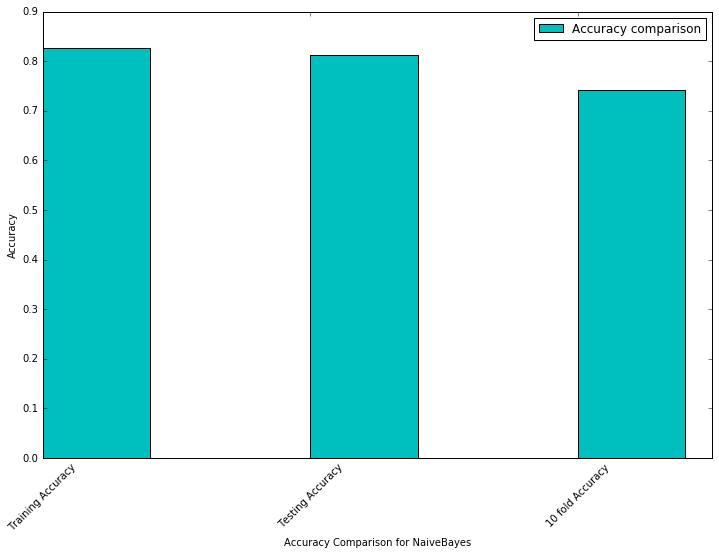

In [34]:
# Plot Naive Bayes Accuracy Graph
x_NB= [2,4,6]
y_NB=[]

y_NB.append(Accuracy_NB_training)
y_NB.append(Accuracy_NB_test)
y_NB.append(Accuracy_NB_Kfold)

PlotGraphNB(x_NB,y_NB)

The following Code creates a two lists. The first list contains [2,4,6] and second list contains training,test and K fold accuracy
for LogisticRegression and calls PlotGraphLR function to plot the accuracies for LogisticRegression

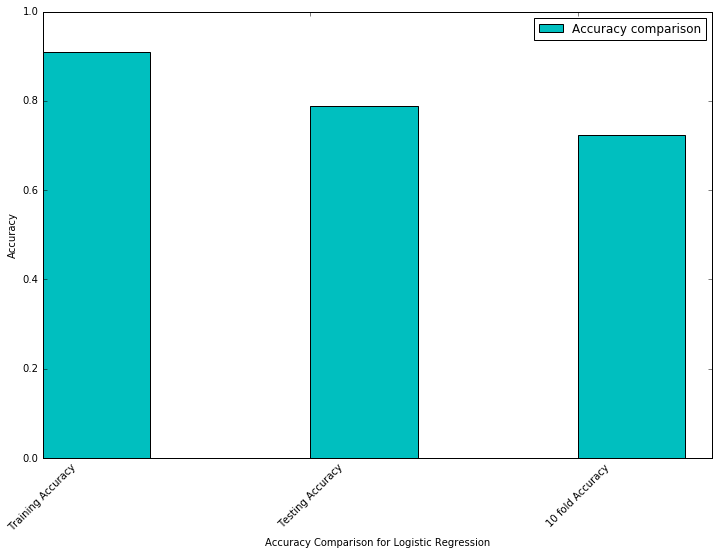

In [32]:
# Plot Logistic Regression Accuracy Graph
x_LR=[2,4,6]
y_LR=[]

y_LR.append(Accuracy_LR_training)
y_LR.append(Accuracy_LR_test)
y_LR.append(Accuracy_LR_Kfold)

PlotGraphLR(x_LR,y_LR)

    


The following code creates 4 lists. Two for Naive Bayes and two for Logistic Regression and Calls the PlotGraph to plot the 
accuracies for both NaiveBayes and Logistic Regression on the same graph

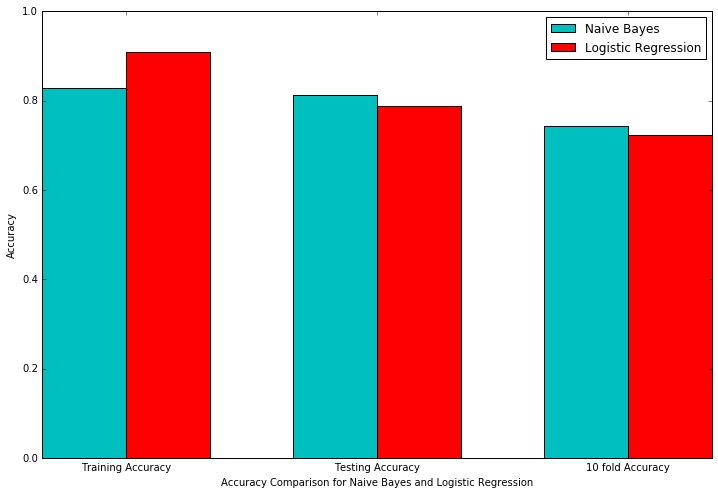

In [48]:
x_NB= [1,4,7]
y_NB=[]

y_NB.append(Accuracy_NB_training)
y_NB.append(Accuracy_NB_test)
y_NB.append(Accuracy_NB_Kfold)

x_LR=[2,5,8]
y_LR=[]

y_LR.append(Accuracy_LR_training)
y_LR.append(Accuracy_LR_test)
y_LR.append(Accuracy_LR_Kfold)

PlotGraph(x_NB,y_NB,x_LR,y_LR)

#PlotGraphNB(x_NB,y_NB)

The following code is used to plot ROC curve for Logistic Regression. I set the initial value of threshold as 0.2 and calculate
true positive rate(TPR) and false positive rate(FPR) and then increase the threshold by 0.2 till it reaches 1.0. Then I plot ROC 
curve with FPR on x axis and TPR on y axis.

###################### To Plot ROC curve for Logistic Regression ######################################
Logistic Regression model training started


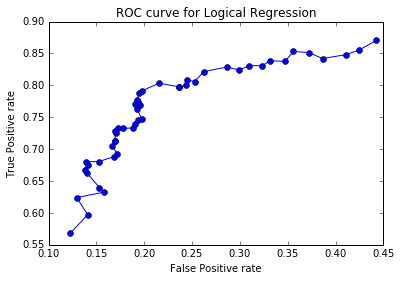

In [52]:
print("###################### To Plot ROC curve for Logistic Regression ######################################")
pol_list=polarity_list
tweet_list=orig_tweet
rdd_train=sc.parallelize(data)
rdd_test=sc.parallelize(test_data)
training=rdd_train
test=rdd_test
# Train a naive Bayes model.

print("Logistic Regression model training started")
model = LogisticRegressionWithLBFGS.train(training)
x=0.02
tpr_list=[]
fpr_list=[]
model.setThreshold(x)
while x<=1.0:
    labelsAndPreds = test.map(lambda p: (p.label, model.predict(p.features)))
    trainErr = labelsAndPreds.filter(lambda t: t[0] != t[1]).count() / float(test.count())
    #print("Training Error = " + str(trainErr))
    #accuracy=1-trainErr
    #print("Test accuracy for Logistic Regression ="+ str(accuracy))
    ###########################################################################
    TP=labelsAndPreds.filter(lambda t: t[0] == t[1] and t[1]==1).count()
    TN=labelsAndPreds.filter(lambda t: t[0] == t[1] and t[1]==0).count()
    FP=labelsAndPreds.filter(lambda t: t[0] != t[1] and t[1]==0).count()
    FN=labelsAndPreds.filter(lambda t: t[0] != t[1] and t[1]==1).count()

    #precision=TP/(TP+FP)
    TPR=TP/(TP+FN)
    FPR=FP/(FP+TN)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    x=x+0.02
    model.setThreshold(x)
    
#fpr_list=fpr_list.sort()
    
plt.plot(fpr_list,tpr_list,"b-o")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC curve for Logical Regression")
plt.show()


